In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_results = pd.read_csv('./wandb_export_2021-12-03T09_38_18.943+00_00.csv')

In [3]:
hyperparams = ['data_source','filters','obs','regularization','units','weights']
metrics = ['GSS_val_average','GSS_val_0','GSS_val_1','total_mean_absolute_error','total_mean_squared_error','total_weighted_mean_absolute_error','total_weighted_mean_squared_error']

In [4]:
gss = df_results.loc[:,'GSS_val_average']

In [5]:
df_results.head(2)

,Name,Runtime,GitHub,Hostname,Notes,GPU Type,Tags,ID,State,User,...,GSS_val_average,best_epoch,best_val_loss,epoch,loss,total_mean_absolute_error,total_mean_squared_error,total_weighted_mean_absolute_error,total_weighted_mean_squared_error,val_loss
0,true-sweep-397,96,https://github.com/SverrirH/Thesis-experiment/...,FB914,-,NVIDIA GeForce RTX 3060 Laptop GPU,NaN,4lrxy6q8,finished,sverrirhd,...,0.372715,28,1589.320801,48,2850.935547,26.194969,2483.568604,26.194970,2483.568622,1605.375000
1,stoic-sweep-403,115,NaN,DESKTOP-S9OG6S3,-,NVIDIA GeForce GTX 1070,NaN,cwuo9pg8,finished,sverrirhd,...,0.372464,22,1579.686768,42,2856.880127,26.279520,2481.341553,26.279521,2481.341393,1614.366211


# Best overall

In [6]:
best_overall = df_results.loc[gss.idxmax(),hyperparams + metrics]
# best_overall.to_clipboard()
best_overall

data_source                                 gauge
filters                                         5
obs                                            48
regularization                                0.0
units                                           0
weights                                         a
GSS_val_average                          0.372715
GSS_val_0                                0.423865
GSS_val_1                                0.321564
total_mean_absolute_error               26.194969
total_mean_squared_error              2483.568604
total_weighted_mean_absolute_error       26.19497
total_weighted_mean_squared_error     2483.568622
Name: 0, dtype: object

# Best for each datasource

In [7]:
hyperparams = ['data_source','filters','obs','regularization','units','weights']
hyperparam_names = ['Data source','Number of filters','Observations','Regularization','Number of LSTM units','Weight scheme']
main_metrics = ['GSS_val_average','GSS_val_0','GSS_val_1','total_mean_absolute_error','total_mean_squared_error']
main_metrics_names = ['Validation GSS average', 'GSS (Gelgjutangi)', 'GSS (Boðagrandi)',
                      'Mean absolute error', 'Mean squared error']


data_sources = ['gauge', 'NWP', 'radar']
best_list = []
for datasource in data_sources:
    # best w.r.t. gss
    gss_best = df_results.loc[df_results.loc[:,'data_source'] == datasource,'GSS_val_average'].idxmax()
    print(datasource)
    best_row = df_results.loc[gss_best,hyperparams + main_metrics]
    best_list.append(best_row)
    
df_best_source = pd.concat(best_list,axis=1)
# df_best_source.to_clipboard()

df_best_source = df_best_source.loc[hyperparams + main_metrics]
df_best_source.index = hyperparam_names + main_metrics_names
df_best_source.iloc[[1,2,4]] = df_best_source.iloc[[1,2,4]].astype(int)
df_best_source.iloc[[3,6,7,8,9,10]] = df_best_source.iloc[[3,6,7,8,9,10]].astype(float).round(3)


df_best_source.columns = df_best_source.iloc[0]
df_best_source = df_best_source.iloc[1:]

df_best_source.iloc[:,[0,2]]

gauge
NWP
radar


Data source,gauge,radar
Number of filters,5,5
Observations,48,24
Regularization,0.0,0.1
Number of LSTM units,0,0
Weight scheme,a,a
Validation GSS average,0.373,0.235
GSS (Gelgjutangi),0.424,0.259
GSS (Boðagrandi),0.322,0.211
Mean absolute error,26.195,30.481
Mean squared error,2483.569,3880.949


In [8]:
print(df_best_source.iloc[:,[0,2]].to_latex())

\begin{tabular}{lll}
\toprule
Data source &     gauge &     radar \\
\midrule
Number of filters      &         5 &         5 \\
Observations           &        48 &        24 \\
Regularization         &       0.0 &       0.1 \\
Number of LSTM units   &         0 &         0 \\
Weight scheme          &         a &         a \\
Validation GSS average &     0.373 &     0.235 \\
GSS (Gelgjutangi)      &     0.424 &     0.259 \\
GSS (Boðagrandi)       &     0.322 &     0.211 \\
Mean absolute error    &    26.195 &    30.481 \\
Mean squared error     &  2483.569 &  3880.949 \\
\bottomrule
\end{tabular}



In [9]:
df_best_source.iloc[:,[1]]

Data source,NWP
Number of filters,1
Observations,48
Regularization,0.1
Number of LSTM units,0
Weight scheme,a
Validation GSS average,0.245
GSS (Gelgjutangi),0.266
GSS (Boðagrandi),0.224
Mean absolute error,30.282
Mean squared error,3978.332


In [10]:
print(df_best_source.iloc[:,[1]].to_latex())

\begin{tabular}{ll}
\toprule
Data source &       NWP \\
\midrule
Number of filters      &         1 \\
Observations           &        48 \\
Regularization         &       0.1 \\
Number of LSTM units   &         0 \\
Weight scheme          &         a \\
Validation GSS average &     0.245 \\
GSS (Gelgjutangi)      &     0.266 \\
GSS (Boðagrandi)       &     0.224 \\
Mean absolute error    &    30.282 \\
Mean squared error     &  3978.332 \\
\bottomrule
\end{tabular}



# Plot the effect of a hyperparameter - data source

Text(0.5, 1.0, 'Data source')

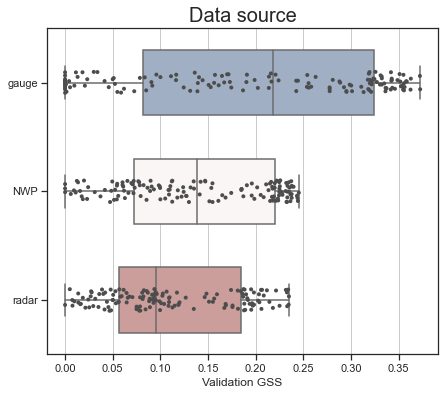

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

input_variable = 'data_source'
output_variable = 'GSS_val_average'
df_results_tmp = df_results.copy()
# df_results_tmp = df_results_tmp.sort_values(input_variable,ascending = False)
df_results_tmp.loc[:,input_variable] = df_results_tmp.loc[:,input_variable].astype(str)
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x=output_variable, y=input_variable, data=df_results_tmp,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=output_variable, y=input_variable, data=df_results_tmp,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="",xlabel="Validation GSS")
ax.set_title('Data source',fontsize=20)
# sns.despine(trim=True, left=True)


Text(0.5, 1.0, 'Number of convolutional filters')

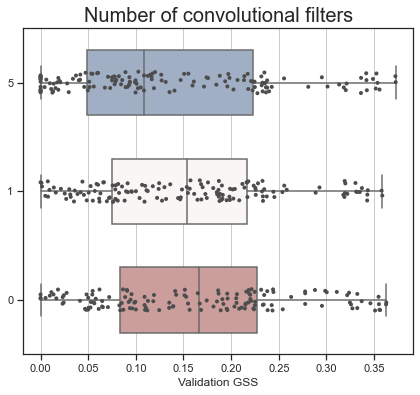

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

input_variable = 'filters'
output_variable = 'GSS_val_average'
df_results_tmp = df_results.copy()
df_results_tmp = df_results_tmp.sort_values(input_variable,ascending = False)
df_results_tmp.loc[:,input_variable] = df_results_tmp.loc[:,input_variable].astype(str)
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x=output_variable, y=input_variable, data=df_results_tmp,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=output_variable, y=input_variable, data=df_results_tmp,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="",xlabel="Validation GSS")
ax.set_title('Number of convolutional filters',fontsize=20)
# sns.despine(trim=True, left=True)


Text(0.5, 1.0, 'Number of LSTM units')

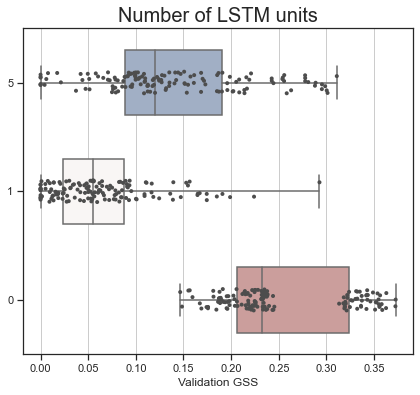

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

input_variable = 'units'
output_variable = 'GSS_val_average'
df_results_tmp = df_results.copy()
df_results_tmp = df_results_tmp.sort_values(input_variable,ascending = False)
df_results_tmp.loc[:,input_variable] = df_results_tmp.loc[:,input_variable].astype(str)
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x=output_variable, y=input_variable, data=df_results_tmp,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=output_variable, y=input_variable, data=df_results_tmp,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="",xlabel="Validation GSS")
ax.set_title('Number of LSTM units',fontsize=20)
# sns.despine(trim=True, left=True)


Text(0.5, 1.0, 'Weight scheme')

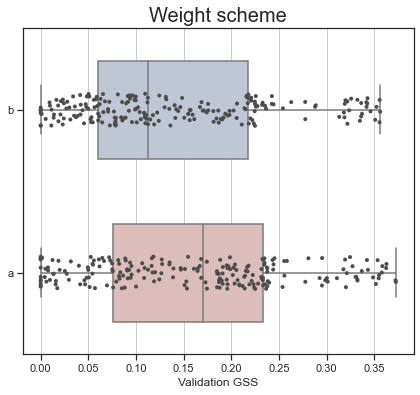

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

input_variable = 'weights'
output_variable = 'GSS_val_average'
df_results_tmp = df_results.copy()
df_results_tmp = df_results_tmp.sort_values(input_variable,ascending = False)
df_results_tmp.loc[:,input_variable] = df_results_tmp.loc[:,input_variable].astype(str)
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x=output_variable, y=input_variable, data=df_results_tmp,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=output_variable, y=input_variable, data=df_results_tmp,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="",xlabel="Validation GSS")
ax.set_title('Weight scheme',fontsize=20)
# sns.despine(trim=True, left=True)


Text(0.5, 1.0, 'Weight scheme')

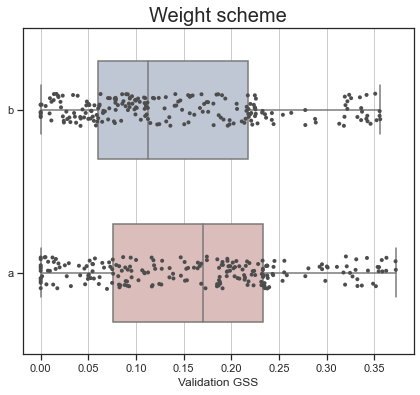

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

input_variable = 'weights'
output_variable = 'GSS_val_average'
df_results_tmp = df_results.copy()
df_results_tmp = df_results_tmp.sort_values(input_variable,ascending = False)
df_results_tmp.loc[:,input_variable] = df_results_tmp.loc[:,input_variable].astype(str)
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x=output_variable, y=input_variable, data=df_results_tmp,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=output_variable, y=input_variable, data=df_results_tmp,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="",xlabel="Validation GSS")
ax.set_title('Weight scheme',fontsize=20)
# sns.despine(trim=True, left=True)


Text(0.5, 1.0, 'Regularization')

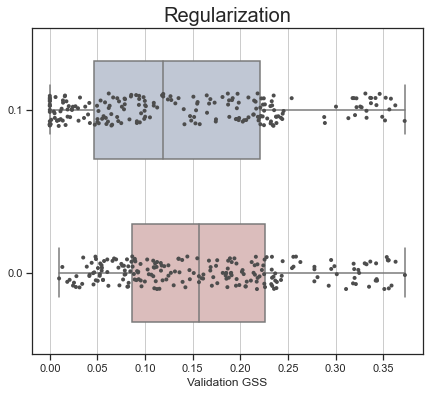

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

input_variable = 'regularization'
output_variable = 'GSS_val_average'
df_results_tmp = df_results.copy()
df_results_tmp = df_results_tmp.sort_values(input_variable,ascending = False)
df_results_tmp.loc[:,input_variable] = df_results_tmp.loc[:,input_variable].astype(str)
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x=output_variable, y=input_variable, data=df_results_tmp,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=output_variable, y=input_variable, data=df_results_tmp,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="",xlabel="Validation GSS")
ax.set_title('Regularization',fontsize=20)
# sns.despine(trim=True, left=True)


Text(0.5, 1.0, 'Number of observations')

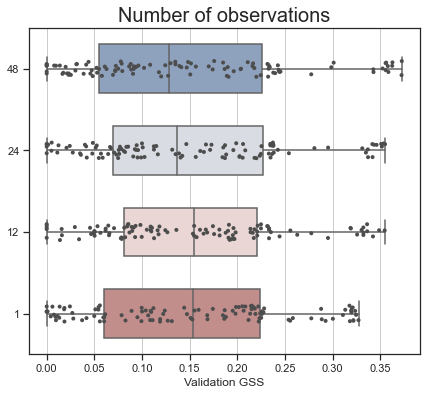

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

input_variable = 'obs'
output_variable = 'GSS_val_average'
df_results_tmp = df_results.copy()
df_results_tmp = df_results_tmp.sort_values(input_variable,ascending = False)
df_results_tmp.loc[:,input_variable] = df_results_tmp.loc[:,input_variable].astype(str)
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x=output_variable, y=input_variable, data=df_results_tmp,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=output_variable, y=input_variable, data=df_results_tmp,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="",xlabel="Validation GSS")
ax.set_title('Number of observations',fontsize=20)
# sns.despine(trim=True, left=True)


# Pairplot

In [18]:
metrics

['GSS_val_average',
 'GSS_val_0',
 'GSS_val_1',
 'total_mean_absolute_error',
 'total_mean_squared_error',
 'total_weighted_mean_absolute_error',
 'total_weighted_mean_squared_error']

<Figure size 720x720 with 0 Axes>

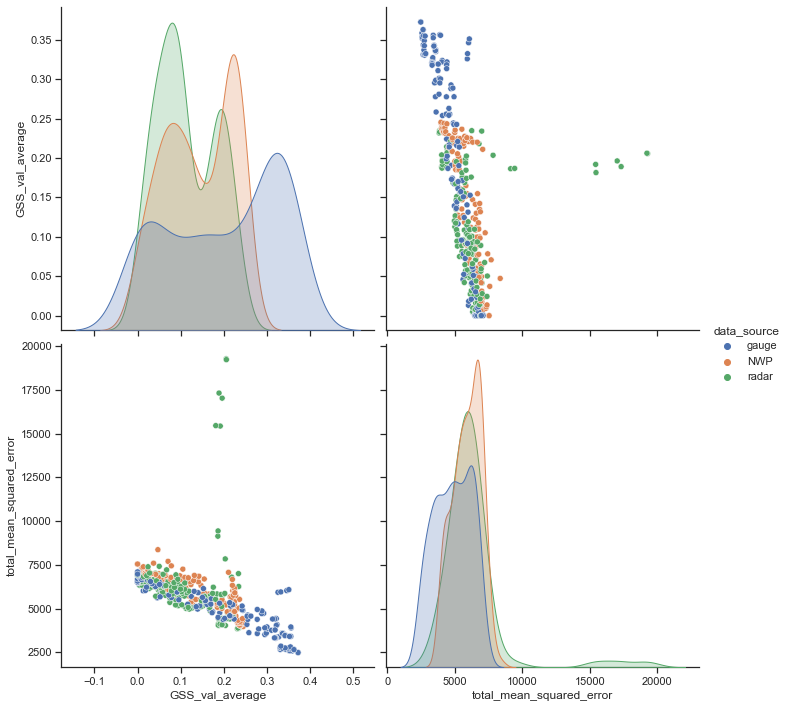

In [19]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.set_theme(style="ticks")
sns.pairplot(df_results.loc[:,['GSS_val_average','total_mean_squared_error'] + ['data_source']], hue="data_source",height=5)
plt.show()

<Figure size 720x720 with 0 Axes>

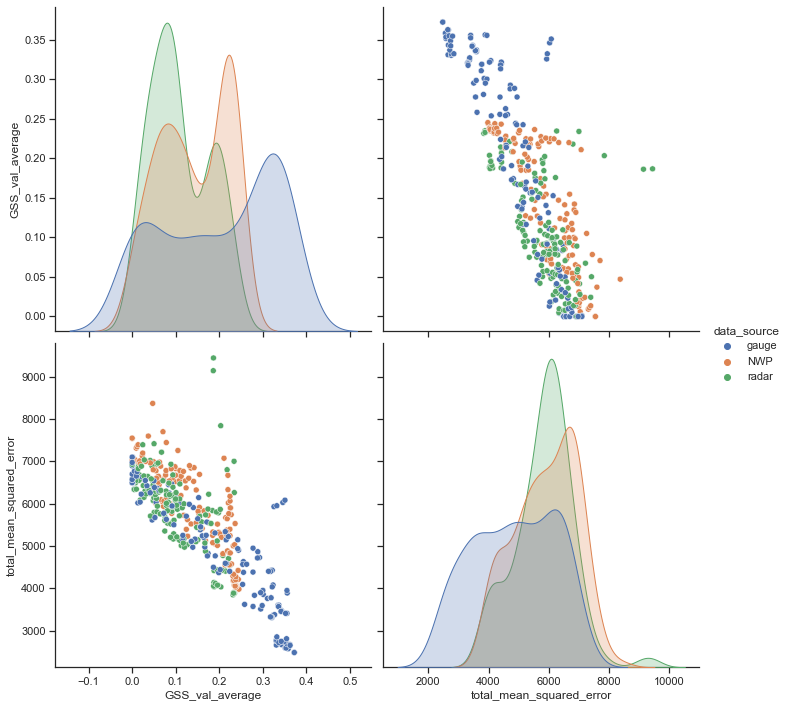

In [20]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.set_theme(style="ticks")
sns.pairplot(df_results.loc[df_results.loc[:,'total_mean_squared_error'] < 10_000].loc[:,['GSS_val_average','total_mean_squared_error'] + ['data_source']], hue="data_source",height=5)
plt.show()

(2000.0, 10000.0)

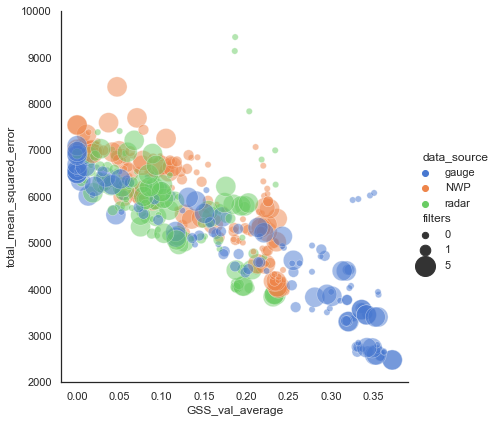

In [21]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="GSS_val_average", y="total_mean_squared_error", hue="data_source", size="filters",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_results)
plt.ylim(2000,10000)
# plt.yscale('log')


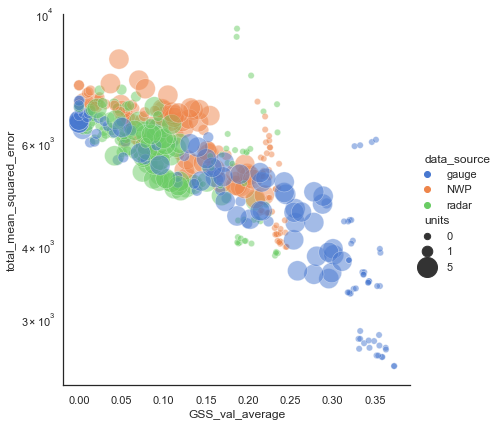

In [22]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="GSS_val_average", y="total_mean_squared_error", hue="data_source", size="units",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_results)
plt.ylim(2300,10000)
plt.yscale('log')


In [23]:
df_results.loc[:,hyperparams]

,data_source,filters,obs,regularization,units,weights
0,gauge,5,48,0.0,0,a
1,gauge,5,48,0.1,0,a
2,gauge,1,48,0.1,0,a
3,gauge,1,48,0.0,0,a
4,gauge,1,24,0.1,0,a
...,...,...,...,...,...,...
427,radar,0,12,0.0,0,b
428,radar,0,48,0.1,0,b
429,radar,0,48,0.0,0,b
430,radar,0,24,0.0,0,b


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
# iris = pd.melt(iris, "species", var_name="measurement")
# iris = pd.melt(df_results, "data_source", var_name="measurement")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


KeyboardInterrupt: 

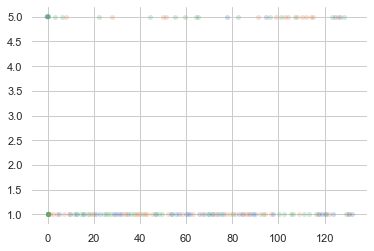

In [25]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
# iris = sns.load_dataset("iris")

# # "Melt" the dataset to "long-form" or "tidy" representation
# # df_results = pd.melt(df_results, "species", var_name="measurement")

# # Initialize the figure
# f, ax = plt.subplots()
# sns.despine(bottom=True, left=True)

# # Show each observation with a scatterplot
# sns.stripplot(x="GSS_val_average", y="units", hue="filters",
#               data=df_results, dodge=True, alpha=.25, zorder=1)

# # Show the conditional means, aligning each pointplot in the
# # center of the strips by adjusting the width allotted to each
# # category (.8 by default) by the number of hue levels
# sns.pointplot(x="GSS_val_average", y="units", hue="filters",
#               data=df_results, dodge=.8 - .8 / 3,
#               join=False, palette="dark",
#               markers="d", scale=.75, ci=None)

# # Improve the legend
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[3:], labels[3:], title="filters",
#           handletextpad=0, columnspacing=1,
#           loc="lower right", ncol=3, frameon=True)

# Effect of convolutional filters on different data sources

In [26]:
def box_plot(df,ax, input_variable = 'obs',output_variable = 'GSS_val_average', name = 'Number of observations',):

    sns.set_theme(style="ticks")
    df_tmp = df.copy()
    df_tmp = df_tmp.sort_values(input_variable,ascending = False)
    df_tmp.loc[:,input_variable] = df_tmp.loc[:,input_variable].astype(str)
    # Initialize the figure with a logarithmic x axis
    # f, ax = plt.subplots(figsize=(7, 6))
    # ax.set_xscale("log")


    # Plot the orbital period with horizontal boxes
    sns.boxplot(x=output_variable, y=input_variable, data=df_tmp,
                whis=[0, 100], width=.6, palette="vlag",ax = ax)

    # Add in points to show each observation
    sns.stripplot(x=output_variable, y=input_variable, data=df_tmp,
                size=4, color=".3", linewidth=0,ax = ax)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    ax.set_xlabel('Validation GSS',fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=16)
    # ax.set_yticklabels(fontsize=12)
    ax.set_title(name,fontsize=20)
    # sns.despine(trim=True, left=True)


In [27]:
# df_results_tmp = df_results[df_results.data_source != 'NWP'].copy()
# df_results_tmp

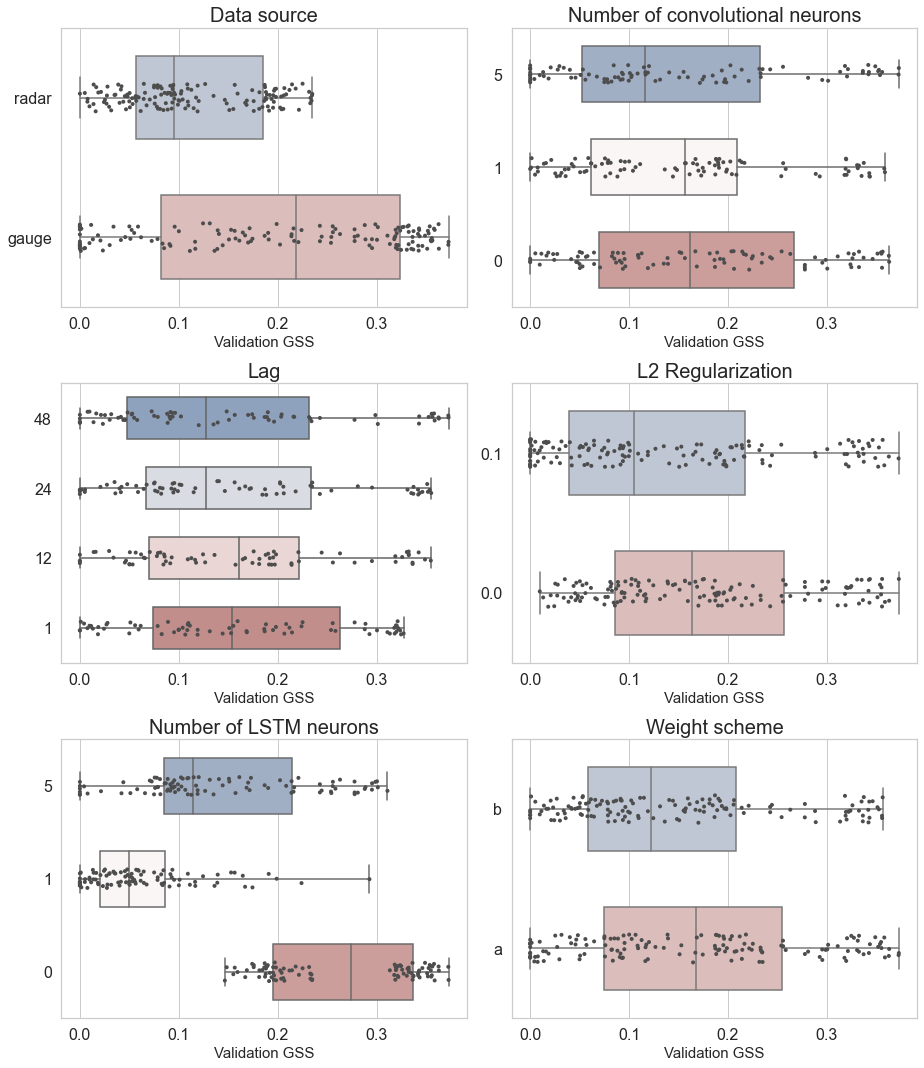

In [28]:
hyperparams
hyperparam_names = ['Data source','Number of convolutional neurons','Lag','L2 Regularization','Number of LSTM neurons','Weight scheme']
f,axes = plt.subplots(3,2,figsize=(6.5*2, 5*3))
for ax,name,param in zip(axes.ravel(),hyperparam_names,hyperparams):
    df_results_tmp = df_results[df_results.data_source != 'NWP'].copy()
    
    box_plot(df_results_tmp,ax = ax,input_variable = param,name = name)
    
    

plt.tight_layout()

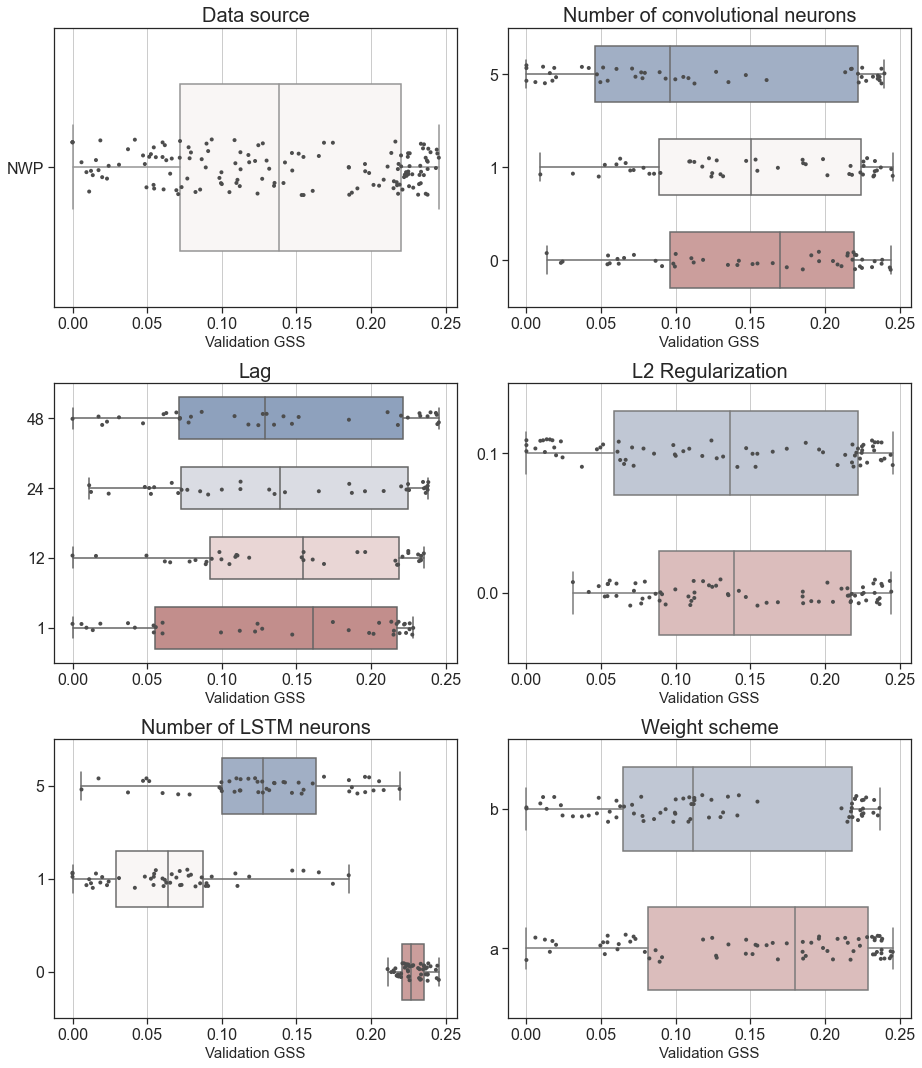

In [29]:
hyperparams
# hyperparam_names = ['Data source','Number of filters','Observations','Regularization','Number of LSTM units','Weight scheme']
hyperparam_names = ['Data source','Number of convolutional neurons','Lag','L2 Regularization','Number of LSTM neurons','Weight scheme']
f,axes = plt.subplots(3,2,figsize=(6.5*2, 5*3))
for ax,name,param in zip(axes.ravel(),hyperparam_names,hyperparams):
    df_results_tmp = df_results[df_results.data_source == 'NWP'].copy()
    
    box_plot(df_results_tmp,ax = ax,input_variable = param,name = name)
plt.tight_layout()